<a href="https://colab.research.google.com/github/Kirithika-M/Machine-Learning-Lab/blob/main/ML_Lab_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Machine Learning : Experiment 08
## Principal Component Analysis

In [11]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [3]:
# 1. Load Dataset
wine = load_wine()
x =  wine.data
y = wine.target

In [4]:
# Standardize features (important for PCA)
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [6]:
# 2. Train / test split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=42, stratify=y)

In [7]:
# 3. Logistic Regression
clf_no_pca = LogisticRegression(max_iter=500)
clf_no_pca.fit(x_train, y_train)
y_pred_no_pca = clf_no_pca.predict(x_test)
acc_no_pca = accuracy_score(y_test, y_pred_no_pca)

In [9]:
# 4. Logistic Regression WITH PCA (reduce to 2 components)
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

clf_pca = LogisticRegression(max_iter=500)
clf_pca.fit(x_train_pca, y_train)
y_pred_pca = clf_pca.predict(x_test_pca)
acc_pca = accuracy_score(y_test, y_pred_pca)

In [10]:
print(f"Accuracy without PCA: {acc_no_pca}")
print(f"Accuracy with PCA: {acc_pca}")

Accuracy without PCA: 0.9814814814814815
Accuracy with PCA: 0.9444444444444444


#### Confusion Matrix (with PCA)

In [27]:
matrix_pca= confusion_matrix(y_pred_pca, y_test)
print(f"Confusion Matrix (with PCA): \n{matrix_pca}")

Confusion Matrix (with PCA): 
[[16  1  0]
 [ 2 20  0]
 [ 0  0 15]]


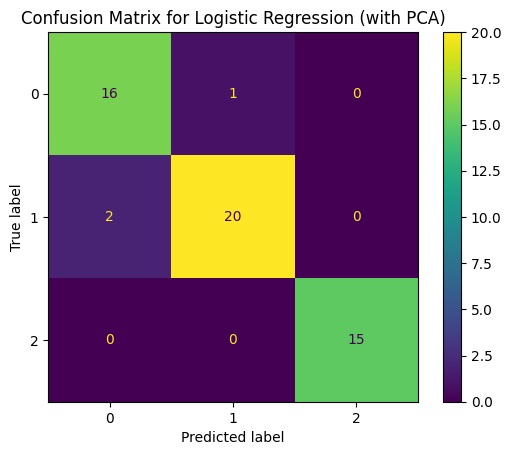

In [31]:
display_pca = ConfusionMatrixDisplay(confusion_matrix=matrix_pca)
display_pca.plot()

plt.title("Confusion Matrix for Logistic Regression (with PCA)")
plt.show()

#### Confusion Matrix (without PCA)

In [29]:
matrix_no_pca = confusion_matrix(y_pred_no_pca, y_test)
print(f"Confusion Matrix (without PCA): \n{matrix_no_pca}")

Confusion Matrix (without PCA): 
[[18  1  0]
 [ 0 20  0]
 [ 0  0 15]]


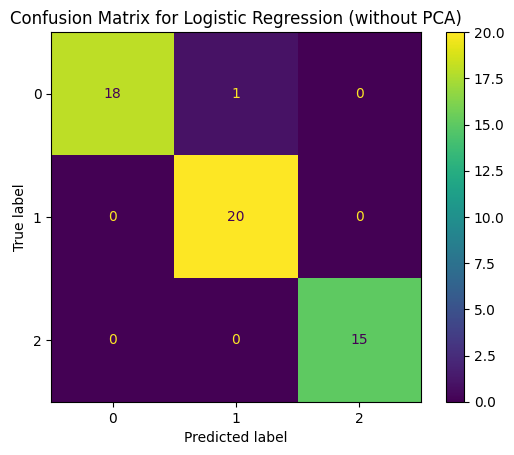

In [33]:
display_no_pca = ConfusionMatrixDisplay(confusion_matrix=matrix_no_pca)
display_no_pca.plot()

plt.title("Confusion Matrix for Logistic Regression (without PCA)")
plt.show()